<a href="https://colab.research.google.com/github/NishchayBhardwaj/DSML/blob/main/AllAssignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment - 1**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

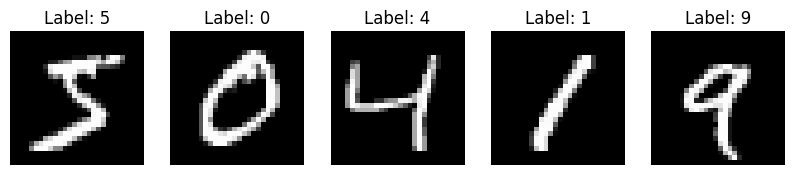

In [ ]:
plt.figure(figsize = (10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(train_images[i].reshape(28,28), cmap = 'gray')
  plt.title(f"Label: {train_labels[i]}")
  plt.axis('off')

plt.show()

In [ ]:
model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(28*28,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8729 - loss: 0.4334 - val_accuracy: 0.9675 - val_loss: 0.1083
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9659 - loss: 0.1085 - val_accuracy: 0.9748 - val_loss: 0.0905
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9784 - loss: 0.0687 - val_accuracy: 0.9773 - val_loss: 0.0758
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9844 - loss: 0.0516 - val_accuracy: 0.9760 - val_loss: 0.0807
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.9742 - val_loss: 0.0930
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9765 - val_loss: 0.0839
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9758 - val_loss: 0.0906
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9944 - loss: 0.0183

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.1192
Test accuracy: 97.35%


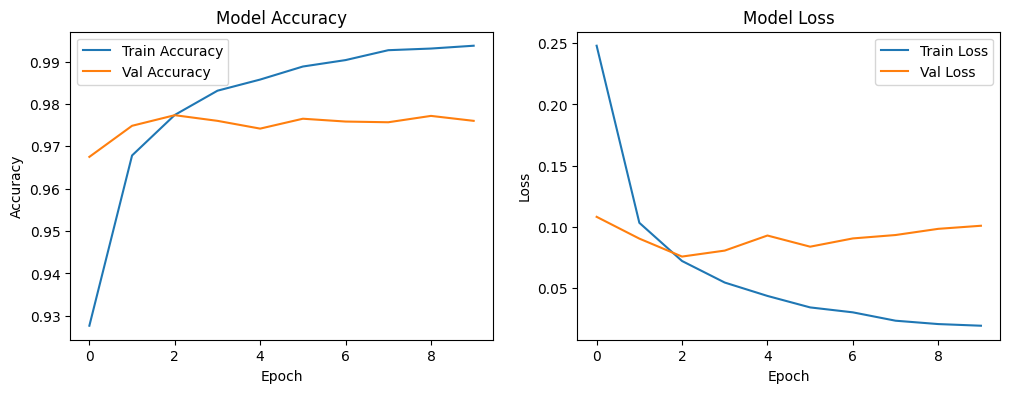

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


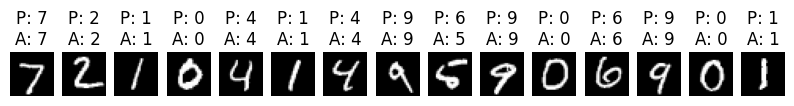

In [ ]:
prediction = model.predict(test_images[:15])
predicted_labels = np.argmax(prediction, axis = 1)

plt.figure(figsize = (10,2))
for i in range(15):
  plt.subplot(1,15,i+1)
  plt.imshow(test_images[i].reshape(28,28), cmap = 'gray')
  plt.title(f"P: {predicted_labels[i]}\nA: {test_labels[i]}")
  plt.axis('off')

plt.show()

# **Assignment - 2**

**1) Face Detection using Dataset**

In [ ]:
import os
import numpy as np
os.environ['KAGGLE_USERNAME'] = "nishchaybhardwaj"
os.environ['KAGGLE_KEY'] = "d690d4a60b6132fb5b712eea39d98be7"

In [ ]:
!kaggle datasets download imrankhan77/autistic-children-facial-data-set

In [ ]:
!unzip /content/autistic-children-facial-data-set.zip

In [ ]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder

# Function to detect face in an image
def detect_face(image_path, face_cascade):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
  return [(x,y,w,h) for (x,y,w,h) in faces]

# Function to extract face from an image
def extract_face(image_path, face_cascade):
  faces = detect_face(image_path, face_cascade)
  if len(faces) == 0:
    return None
  img = cv2.imread(image_path)
  x,y,w,h = faces[0]
  face_img = img[x:x + w, y:y + h]
  return face_img

# Function to prepare data: load, detect and extract
def prepare_data(data_directory, face_cascade):
  labels = []
  faces = []
  label_names = os.listdir(data_directory)
  for label_name in label_names:
    label_dir = os.path.join(data_directory, label_name)
    for img_name in os.listdir(label_dir):
      img_dir = os.path.join(label_dir, img_name)
      face_img = extract_face(img_dir, face_cascade)
      if face_img is not None:
        faces.append(cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY))
        labels.append(label_name)

  return faces, labels, label_names

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

data_directory = '/content/train'
faces, labels, label_names = prepare_data(data_directory, face_cascade)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(faces, np.array(encoded_labels))

def recognize_face(image_path, recognizer, face_cascade, label_encoder):
  face_img = extract_face(image_path, face_cascade)
  if face_img is not None:
    gray_image = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    label, confidence = recognizer.predict(gray_image)
    name = label_encoder.inverse_transform([label])[0]
    return name, confidence
  return None, None

image_path = '/content/Sad_Person.jpeg'
name, confidence = recognize_face(image_path, recognizer, face_cascade, label_encoder)
print(f"Predicted name: {name}, Confidence: {confidence}")

Predicted name: autistic, Confidence: 110.2734627425193


**2) Face Detection using Webcam**

In [ ]:
import cv2

# Initialize face detector
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Start video capture
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    # Detect faces and draw rectangles
    faces = faceCascade.detectMultiScale(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), 1.1, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 2)

    # Display the resulting frame
    cv2.imshow('Face Detection', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
video_capture.release()
cv2.destroyAllWindows()

# **Assignment - 3**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

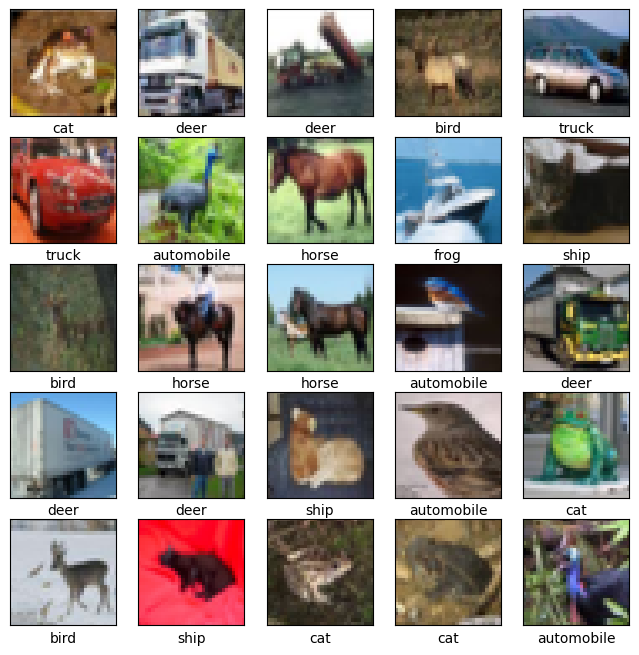

In [ ]:
class_names = ['airplane', 'truck', 'automobile', 'ship', 'bird', 'dog', 'cat', 'horse', 'frog', 'deer']

plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs = 10,
    validation_data = (test_images, test_labels),
    batch_size = 128
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 181ms/step - accuracy: 0.2952 - loss: 1.9047 - val_accuracy: 0.4773 - val_loss: 1.4214
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 172ms/step - accuracy: 0.5095 - loss: 1.3736 - val_accuracy: 0.5539 - val_loss: 1.2622
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 173ms/step - accuracy: 0.5688 - loss: 1.2141 - val_accuracy: 0.5995 - val_loss: 1.1334
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 171ms/step - accuracy: 0.6093 - loss: 1.1059 - val_accuracy: 0.6180 - val_loss: 1.0621
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 169ms/step - accuracy: 0.6387 - loss: 1.0271 - val_accuracy: 0.6470 - val_loss: 1.0060
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.6682 - loss: 0.9566 - val_accuracy: 0.6638 - val_loss: 0.9580
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 169ms/step - accuracy: 0.6893 - loss: 0.8941 - val_accuracy: 0.6759 - val_loss: 0.9269
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 168ms/step - accuracy: 0.6988 - loss: 0.8577 - val

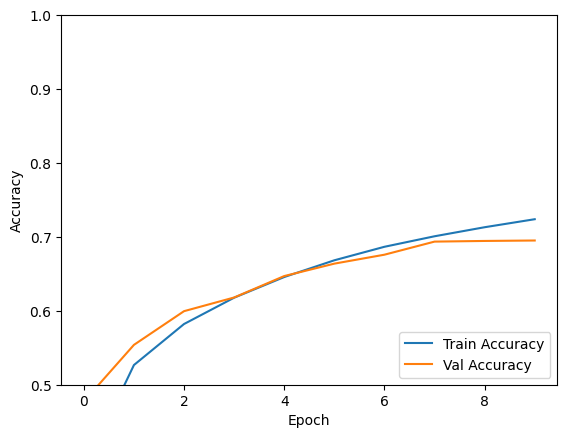

In [ ]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 4s - 12ms/step - accuracy: 0.6951 - loss: 0.8767


In [ ]:
print(f"Accuracy: {test_accuracy}")

Accuracy: 0.6951000094413757


# **Assignment - 4**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
dataframe = pd.read_csv('/content/apple_share_price.csv')

dataframe.head()

In [ ]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)

In [ ]:
closing_values = dataframe[['Close']].values
scaler_obj = MinMaxScaler(feature_range = (0,1))
normalized_data = scaler_obj.fit_transform(closing_values)

In [ ]:
def generate_sequences(data, sequence_length):
  X_seq = []
  y_seq = []
  for i in range(len(data) - sequence_length):
    X_seq.append(data[i:i + sequence_length])
    y_seq.append(data[i + sequence_length])

  return np.array(X_seq), np.array(y_seq)

sequence_length = 60
X, y = generate_sequences(normalized_data, sequence_length)

In [ ]:
train_test_split = int(len(X) * 0.8)
X_train, X_test = X[:train_test_split], X[train_test_split:]
y_train, y_test = y[:train_test_split], y[train_test_split:]

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))

In [ ]:
model.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

In [ ]:
predicted_values = model.predict(X_test)

predicted_values_scaled = scaler_obj.inverse_transform(predicted_values)
actual_values_scaled = scaler_obj.inverse_transform(y_test.reshape(-1,1))

In [ ]:
plt.plot(actual_values_scaled, color="red", label="Actual Prices")
plt.plot(predicted_values_scaled, color="blue", label="Predicted Prices")
plt.title("Actual vs Predicted RNN Prices")
plt.xlabel("Time")
plt.ylabel("Stock_Price")
plt.legend()
plt.show()

# **Assignment - 5**

In [9]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
^C


In [10]:
import cv2
import os
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

In [11]:
def preprocess_image(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  denoised = cv2.fastNlMeansDenoising(gray)
  thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  return thresh

In [12]:
def detect_text_region(image):
  boxes = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
  return boxes

In [13]:
def draw_bounding_boxes(image, boxes):
  output = image.copy()
  n_boxes = len(boxes['level'])
  for i in range(n_boxes):
    if int(boxes['conf'][i]) > 60:
      (x,y,w,h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])
      cv2.rectangle(output, (x,y), (x + w, y + h), (0, 255, 0), 2)
  return output

In [14]:
def get_detected_text(boxes):
  detected_text = []
  n_boxes = len(boxes['level'])
  for i in range(n_boxes):
    if int(boxes['conf'][i]) > 60:
      detected_text.append(boxes['text'][i])
  return ' '.join(detected_text)

In [15]:
image_path = '/content/OCR Text Recognition.jpg'

image = cv2.imread(image_path)

In [16]:
if image is None:
  print(f"Error: Unable to read the image file: {image_path}")
else:
  print("\nOriginal Image:")
  cv2_imshow(image)

  preprocessed = preprocess_image(image)
  boxes = detect_text_region(preprocessed)

  image_with_boxes = draw_bounding_boxes(image, boxes)
  print("\nImage with Text Detected Regions:")
  cv2_imshow(image_with_boxes)

  detected_text = get_detected_text(boxes)
  print("Detected text:")
  print(detected_text)

Error: Unable to read the image file: /content/OCR Text Recognition.jpg


# **Assignment - 6**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
data = pd.read_csv('/content/IMDB Dataset.csv')

data['review'] = data['review'].str.replace('<.*?>', '').str.replace('[^A-Za-z]', ' ')
data['review'] = data['review'].str.lower()
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size = 0.2)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=100)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=100)

In [ ]:
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 32, input_length=100),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3, batch_size=128)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {test_acc*100:.2f}%")

In [ ]:
def predict_sentiment(review):
  review = review.lower()
  review = ''.join([c if c.isalpha() or c.isspace() else ' ' for c in review])
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=100)

  result = model.predict(padded_sequence)[0][0]
  sentiment = 'positive' if result >= 0.5 else 'negative'
  print(f"Review: {review}\nPredicted Sentiment: {sentiment}")

while(True):
  user_review = input("Enter a movie review(or type 'exit' to quit): ")
  if user_review.lower() == 'exit' :
    break
  predict_sentiment(user_review)

# **Assignment - 7**

**1) Using Torch yolov5s**

In [ ]:
!pip install torch torchvision opencv-python

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-17 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


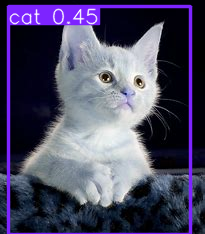

Saved 1 image to runs/detect/exp2


       xmin     ymin        xmax   ymax  confidence  class name
0  8.976315  6.22637  190.685242  234.0    0.452004     15  cat


In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

image_path = '/content/Cat Image.jpeg'
image = cv2.imread(image_path)

results = model(image)

results.show()

results.save('output/')

df = results.pandas().xyxy[0]
print(df)

**2) Using Torch yolov10n.pt**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 11.6 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



0: 416x640 1 bird, 298.4ms
Speed: 5.9ms preprocess, 298.4ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


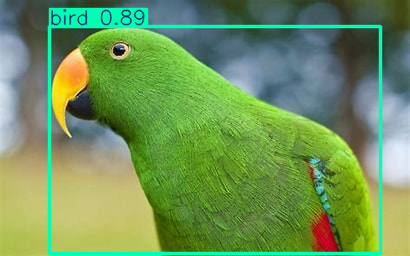

In [7]:
import cv2

model = YOLO('yolov10n.pt')

image_path = '/content/Parrot.jpeg'
image = cv2.imread(image_path)

results = model(image)

results[0].show()